In [1]:
import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn import datasets

# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.models import Sequential, Model, load_model
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from tensorflow.keras import utils
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# import nltk
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('amazon_au_marketing.tsv', sep='\t')

/Users/lin/opt/anaconda3/envs/cpsc330env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
to_drop = [
    'Dataset Origin', 'Match Rank', 'Match Score', 
    'Match Type', 'Upc', 'Product Available Inventory', 
    'Product Url', 'Retailer', 'Product Barcode', 
    'Product Model Number', 'Product Reviews Count', 
    'Bsr', 'Joining Key', 'Market', 'Product Currency',
    'Sku', 'Uniq Id', 'Crawl Timestamp', 'Product Id',
    'Product Company Type Source', 'Product Brand Normalised Source',
    'Product Rating', 'Product Price'
]

df_cleaned = df.drop(columns=to_drop)

In [4]:
len(df_cleaned.columns)/len(df.columns)

0.28125

In [5]:
df_cleaned.head()

,Product Brand Source,Product Name Source,Product Category,Product Brand,Product Name,Product Description,Product Image Url,Product Tags,Product Contents
0,Koala Superstore,6-inch Photo Frame Lovely Bear Painted Photof...,Home > Home Décor > Photo Frames,Koala Superstore,6-inch Photo Frame Lovely Bear Painted Photof...,Ships from Hongkong. These picture frames look...,https://images-na.ssl-images-amazon.com/images...,6-inch Photo Frame Lovely Bear Painted Photof...,Size: 14.5*7CM/5.7*2.7inch. Material: Resin. ...
1,Ambesonne,"Ambesonne Tan Throw Pillow Cushion Cover, Str...",Home > Home Textiles > Cushions & Accessories ...,Ambesonne,"Ambesonne Tan Throw Pillow Cushion Cover, Str...",Makeover and refresh your rooms with just a si...,https://images-na.ssl-images-amazon.com/images...,"Ambesonne Tan Throw Pillow Cushion Cover, Str...",20 INCHES x 20 INCHES - DOUBLE SIDED PRINT - ...
2,Alien Storehouse,5Pairs Girl Clip-on Earrings Child Pendant Ea...,Home > Bath > Bath Linen,Alien Storehouse,5Pairs Girl Clip-on Earrings Child Pendant Ea...,Ships from Hongkong. Every little girl likes t...,https://images-na.ssl-images-amazon.com/images...,5Pairs Girl Clip-on Earrings Child Pendant Ea...,Material: Safe resin/plastic/rhinestone/other...
3,CELYCASY,Organic Farm Sign~Rustic Wood Sign~Food Sign~...,Home > Home Décor > Signs & Plaques,CELYCASY,Organic Farm Sign~Rustic Wood Sign~Food Sign~...,This will make you smile every time you look a...,https://images-na.ssl-images-amazon.com/images...,Organic Farm Sign~Rustic Wood Sign~Food Sign~...,Made of Environmentally friendly wood ! Print...
4,NaN,NaN,Lighting > Indoor Lighting > Children's Lighting,Carl Artbay table lamp,Modern Wrought Iron Base Living Room Bedroom ...,Each lamp is designed and handcrafted by the a...,https://images-na.ssl-images-amazon.com/images...,Modern Wrought Iron Base Living Room Bedroom ...,"★Handmade glass lampshade, high quality metal..."


In [6]:
df_cleaned.describe()

,Product Brand Source,Product Name Source,Product Category,Product Brand,Product Name,Product Description,Product Image Url,Product Tags,Product Contents
count,24968,25000,29919,29896,30000,29136,30000,30000,29900
unique,4423,24555,435,5861,29427,16947,29490,29427,16635
top,Liufengyun,RADANYA Nature Printed Polyester Cushion Cove...,Home > Home Textiles > Cushions & Accessories ...,Liufengyun,RADANYA Nature Printed Polyester Cushion Cove...,Digitally Printed Cushion Cover in Polyester f...,https://images-na.ssl-images-amazon.com/images...,RADANYA Nature Printed Polyester Cushion Cove...,
freq,1283,52,3608,1377,68,711,31,68,805


In [7]:
df['Product Category'].unique()

array(['Home > Home Décor > Photo Frames',
       'Home > Home Textiles > Cushions & Accessories > Cushion Covers',
       'Home > Bath > Bath Linen', 'Home > Home Décor > Signs & Plaques',
       "Lighting > Indoor Lighting > Children's Lighting",
       'Beauty > Tools & Accessories > Makeup Brushes & Tools > Brushes',
       'Health, Household & Personal Care > Household & Cleaning > Indoor Insect & Pest Control',
       'Home > Furniture > Living Room Furniture > Footstools',
       'Home > Home Décor > Doormats',
       'Garden > Garden & Patio Furniture > Cushions',
       'Home > Home Décor > Seasonal Décor > Stockings & Holders',
       'Home Improvement > Hardware > Bathroom Hardware & Installation > Robe & Towel Hooks',
       'Home > Home Décor > Mirrors > Wall-Mounted Mirrors',
       'Home Improvement > Hardware > Bathroom Hardware & Installation > Towel Bars',
       'Home > Bath > Bathroom Accessories > Shower Curtains, Hooks & Liners',
       'Home > Bedding & Linen > P

In [8]:
df_train, df_test = train_test_split(df_cleaned, random_state=123)
len(df_train)/len(df_test)

3.0

In [32]:
word = 'Home > Home Décor > Photo Frames'
df_train.columns

Index(['Product Brand Source', 'Product Name Source', 'Product Category',
       'Product Brand', 'Product Name', 'Product Description',
       'Product Image Url', 'Product Tags', 'Product Contents'],
      dtype='object')

In [10]:
df_train.dropna(axis=0, subset=['Product Image Url'], inplace=True)
df_test.dropna(axis=0, subset=['Product Image Url'], inplace=True)

print(len(df_train)/len(df_test))

image_train = df_train['Product Image Url']
x_train = df_train.drop(columns=['Product Category', 'Product Image Url'])
y_train = df_train['Product Category'] == word

image_test = df_test['Product Image Url']
x_test = df_test.drop(columns=['Product Category', 'Product Image Url'])
y_test = df_test['Product Category'] == word

x_train['corpus'] = x_train.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
x_train = x_train['corpus']
x_test['corpus'] = x_test.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
x_test = x_test['corpus']

<ipython-input-10-ee32468bb4b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(axis=0, subset=['Product Image Url'], inplace=True)
<ipython-input-10-ee32468bb4b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(axis=0, subset=['Product Image Url'], inplace=True)


3.0


In [30]:
x_train.head().iloc[0]

'Vistaric, Peace Dove Bird Cookie Cutter Gift Decorating Tool Biscuit Jelly Fondant Mold Tools for Christmas Birthday Party Wedding Holiday ,Vistaric, Peace Dove Bird Cookie Cutter Gift Decorating Tool Biscuit Jelly Fondant Mold Tools for Christmas Birthday Party Wedding Holiday ,Type: Cake Tools, Feature: Stocked,Eco-Friendly, Certification: FDA,SGS, Model Number: 20-42, Brand Name: FACEMILE, Cake Tools Type: Moulds, Material: Stainless Steel, Unit Type: piece, Package Weight: , Package Size:, Peace Dove Bird Cookie Cutter Gift Decorating Tool Biscuit Jelly Fondant Mold Tools for Christmas Birthday Party Wedding Holiday , Item package Quantity:1 Peace Dove Bird Cookie Cutter Gift Decorating Tool Biscuit Jelly Fondant Mold Tools for Christmas Birthday Party Wedding Holiday we ship internationally Easy to store Loading EDP related metadata '

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [13]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [14]:
dc = DummyClassifier(strategy='prior')
dc.fit(x_train, y_train)
dc.score(x_train, y_train)

0.9742666666666666

In [15]:
dc.score(x_test, y_test)

0.9750666666666666

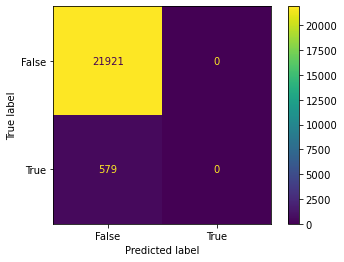

In [16]:
plot_confusion_matrix(dc, x_train, y_train)

In [17]:
countvec = CountVectorizer(stop_words='english')

In [18]:
def cross_validate_std(*args, **kwargs):
    """Like cross_validate, except also gives the standard deviation of the score"""
    res = pd.DataFrame(cross_validate(*args, **kwargs))
    res_mean = res.mean()

    res_mean["std_test_score"] = res["test_score"].std()
    if "train_score" in res:
        res_mean["std_train_score"] = res["train_score"].std()
    return res_mean

In [34]:
pipe_lr = make_pipeline(countvec, LogisticRegression())

cross_validate_std(pipe_lr, x_train, y_train, return_train_score=True, cv=5, scoring='precision')

fit_time           4.314329
score_time         0.817600
test_score         0.973639
train_score        1.000000
std_test_score     0.012154
std_train_score    0.000000
dtype: float64

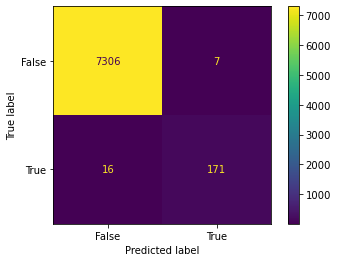

In [28]:
pipe_lr.fit(x_train, y_train)
plot_confusion_matrix(pipe_lr, x_test, y_test)